# Challenge $0$


## 1. ***Data cleaning with Pandas***

Use the library `pandas` to load and clean the required dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from seaborn import pairplot

Obtain the data file

In [2]:
FFILE = './50_Startups.csv'
if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"
else:
    print("Either the file is missing or not readable, download it")
    !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"

Either the file is missing or not readable, download it
--2023-11-23 16:15:23--  https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv
Resolving raw.github.com (raw.github.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv [following]
--2023-11-23 16:15:23--  https://raw.githubusercontent.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2436 (2.4K) [text/plain]
Saving to: ‘50_Startups.csv’

50_Startups.csv     100%[====

In [3]:
# load the dataset using pandas
data = pd.read_csv('50_Startups.csv')

# Extracting the features (independent variables) and labels (dependent variable)
# Features (X) are taken from all columns except the last two
X = data.iloc[:,:-2].values

# Labels (y) are taken from the third column (index 3, considering the 0-based index in Python)
y = data.iloc[:,3].values

df = pd.DataFrame(data)

In [ ]:
y

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

In [ ]:
X

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

***Play with data***

In [4]:
df.shape

(50, 5)

In [5]:
df.replace(to_replace = 0.00, value = df.mean(axis=0), inplace=True)  # inject the mean of the column when value is 0
df.head()

<ipython-input-5-84577155662a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.replace(to_replace = 0.00, value = df.mean(axis=0), inplace=True)  # inject the mean of the column when value is 0


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94




df.replace() function:

    This function is used to replace specific values within a DataFrame (df) with another value.
    The parameters used are:
        - to_replace=0.00: This specifies the value in the DataFrame that needs to be replaced, in this case, 0.00.
        - value=df.mean(axis=0): This sets the replacement value for the matched condition. Here, df.mean(axis=0) calculates the mean for each column along the rows (axis=0) of the DataFrame df. The mean value for each column will replace the 0.00 values.
        - inplace=True: This parameter ensures that the modification is done directly on the original DataFrame (df) without creating a new DataFrame. If inplace is set to True, the original DataFrame is modified.



***Select two categories for binary classification***

In [6]:
df_sel=df[(df.State=="California") | (df.State=="Florida")]

In [7]:
df_sel.head() # column title and first rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


In [8]:
df_sel.dtypes # type of each column

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

***Encode categorical data***

One-hot encoding of categorical feature _State_
One-Hot Encoding is a technique used in machine learning to handle categorical variables by transforming them into a format that can be easily utilized by algorithms.

Imagine having a categorical variable, such as colors: red, green, and blue. With One-Hot Encoding, each color becomes a new binary column. If an observation has a specific color, the column corresponding to that color will be set to 1, while the other columns will be set to 0.

For example:

    If you have categories "red", "green", "blue", and you want to encode them using One-Hot Encoding:
        "red" becomes [1, 0, 0]
        "green" becomes [0, 1, 0]
        "blue" becomes [0, 0, 1]

This helps machine learning algorithms to understand and work with these categorical variables more effectively, as it doesn't impose an order or hierarchy among the categories but rather represents them in a form that the algorithm can interpret more efficiently.

In [9]:
df_one = pd.get_dummies(df_sel["State"])

In [10]:
df_one.head()

,California,Florida
1,1,0
2,0,1
4,0,1
6,1,0
7,0,1


In [11]:
# construct the final dataset that you will use for learning and prediction
df_fin = pd.concat((df_one, df_sel), axis=1)
df_fin = df_fin.drop(["Florida"], axis=1)
df_fin = df_fin.drop(["State"], axis=1)
# California is class 1, Florida is class 0
df_fin = df_fin.rename(columns={"California": "State"})
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


In [12]:
# Constructing the final dataset for learning and prediction

# Concatenating two DataFrames 'df_one' and 'df_sel' along columns (axis=1)
df_fin = pd.concat((df_one, df_sel), axis=1)

# Dropping the column "Florida" from the dataset as it was not selected for the final model
df_fin = df_fin.drop(["Florida"], axis=1)

# Dropping the column "State" (assumed to be the original 'State' column) as it is not required in its original form
df_fin = df_fin.drop(["State"], axis=1)

# Renaming the column "California" to "State" as part of preparing the dataset for classification (1 for California, 0 for Florida)
df_fin = df_fin.rename(columns={"California": "State"})

# Displaying the initial rows of the modified final dataset
df_fin.head()


,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


***Normalize***

Divide by the absolute value of the maximum so that features are in \[0, 1\]

In [15]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [13]:
def absolute_maximum_scale(series):
    """
    Scale each column in the DataFrame 'df_fin' by dividing the values by the absolute maximum value of that column.

    Args:
    series: A pandas Series or DataFrame column to be scaled.

    Returns:
    A scaled version of the input series with values ranging from -1 to 1 based on the maximum absolute value in the column.
    """
    return series / series.abs().max()


In [ ]:
# Apply the 'absolute_maximum_scale' function to each column in the DataFrame 'df_fin'
for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [16]:
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1.0,1.000000,0.828805,1.000000,1.000000
2,0.0,0.943688,0.553781,0.918982,0.996133
4,0.0,0.873981,0.500378,0.824892,0.866501
6,1.0,0.827905,0.805926,0.287716,0.814020
7,0.0,0.801353,0.796789,0.729619,0.812091


***Classification***

Prepare the dataset:

In [17]:
y = df_fin["State"] # ground truth labels
X = df_fin.drop(["State"], axis=1) # datapoints features
# extract actual values from series
y = y.values
X = X.values

Train test split

$75\%$ of the data are in the training set, the remaining $25\%$ constitutes the test set.

In [18]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X represents the features (independent variables), and y represents the target (dependent variable).

# Using train_test_split function to create the training and testing sets
# X_train and y_train: Training features and labels
# X_test and y_test: Testing features and labels

# The 'test_size=0.25' parameter sets the proportion of the dataset to include in the test split. Here, 25% of the data is allocated to the test set.
# The 'random_state=0' parameter sets the random seed for reproducibility of the split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)



Quanti dati ci sono per ogni classe?

In [19]:
val_counts = df_fin['State'].value_counts()
print("Number of samples for each class: ")
for i in range(len(val_counts)):
    print(" - Class {}: {}".format(i, val_counts[i]))

Number of samples for each class: 
 - Class 0: 16
 - Class 1: 17


Potrebbe tornarmi anche utile andare a valutare le correlazioni tra le varie classi

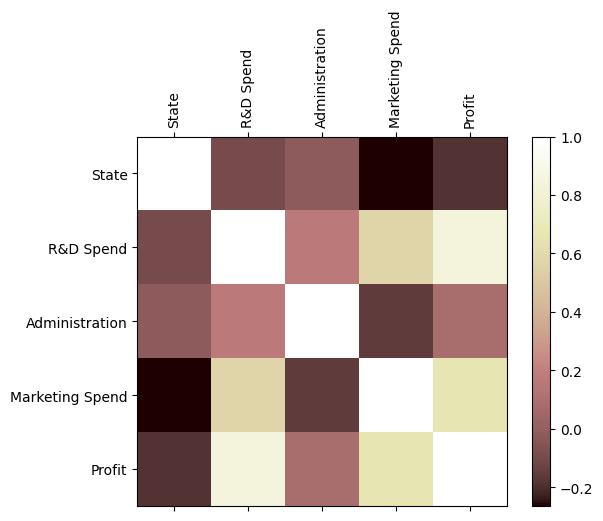

In [20]:
corr = df_fin.corr()
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(corr, cmap='pink')
fig.colorbar(cax)
ticks = np.arange(0, len(corr.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.xticks(rotation=90)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In [21]:
print(df_fin.columns)

Index(['State', 'R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')


Sembra esserci poca correlazione tra le variabile categorica State le le altre variabili. Scegliamo di perndere le variabili che comunque risultano essere più correlate con state quindi inzialmente fare un paiplot e poi di visualizzare uno scatterplot tra R&S Spend, Administration e State


                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.168762         0.574895  0.838785
Administration    0.168762        1.000000        -0.156017  0.082222
Marketing Spend   0.574895       -0.156017         1.000000  0.662070
Profit            0.838785        0.082222         0.662070  1.000000


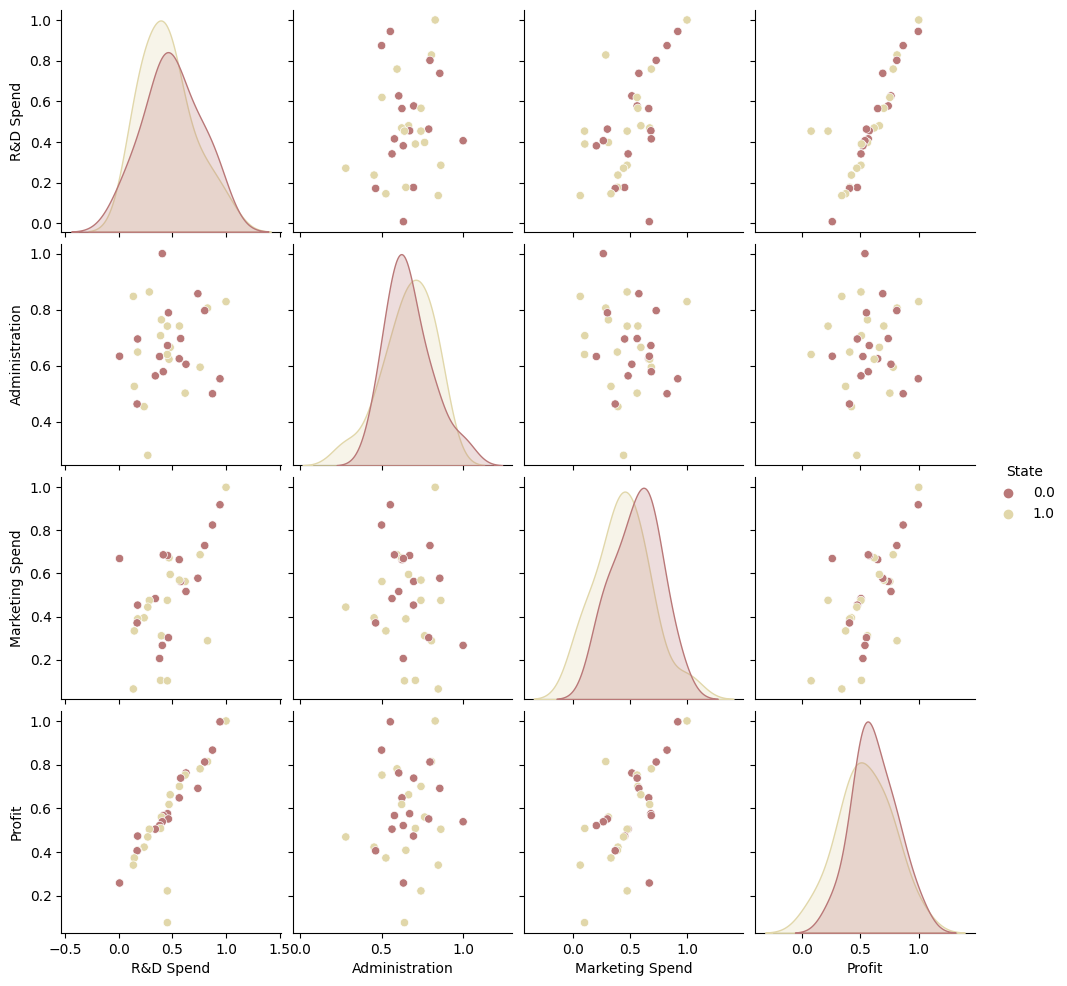

In [22]:
print(df_fin.drop(["State"], axis = 1).corr())
pairplot(df_fin, hue="State", palette = "pink")

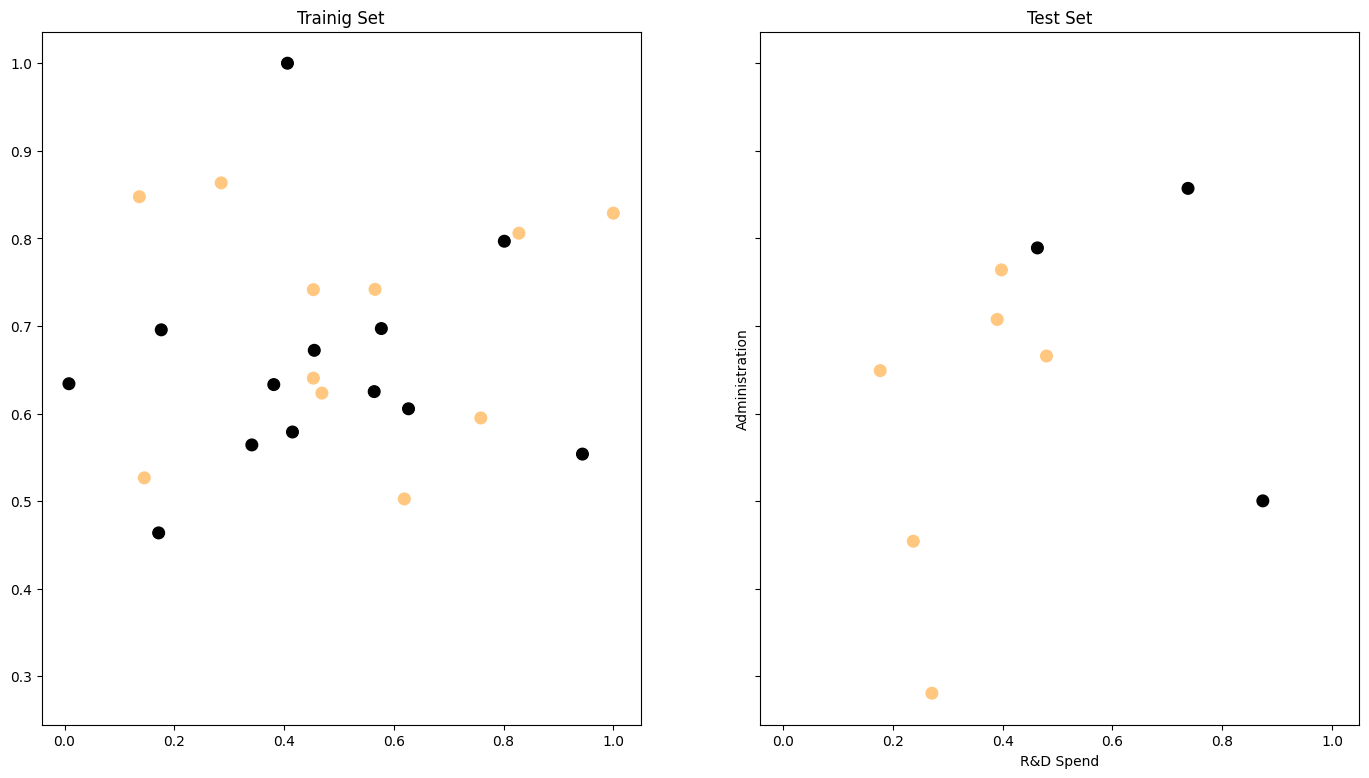

In [105]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True, figsize=(17, 9))

# Trainig Set
ax1.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='copper', s=70)
ax1.set_title("Trainig Set")
plt.xlabel("R&D Spend")
plt.ylabel("Administration")
plt.title("Training Set")

# Test set
ax2.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='copper', s=70)
ax2.set_title("Test Set")
plt.xlabel("R&D Spend")
plt.ylabel("Administration")
plt.title("Test Set")

plt.show()

###Train the Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
# Creating a Logistic Regression model with specific parameters
# - 'random_state=0' ensures reproducibility by setting the random seed.
# - 'solver='lbfgs'' selects the optimization algorithm for the logistic regression.

LR = LogisticRegression(random_state=0, solver='lbfgs', penalty = 'none').fit(X_train, y_train)

# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
predictions = LR.predict(X_test)

# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).
accuracy = round(LR.score(X_test, y_test), 4)
accuracy



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


0.2222

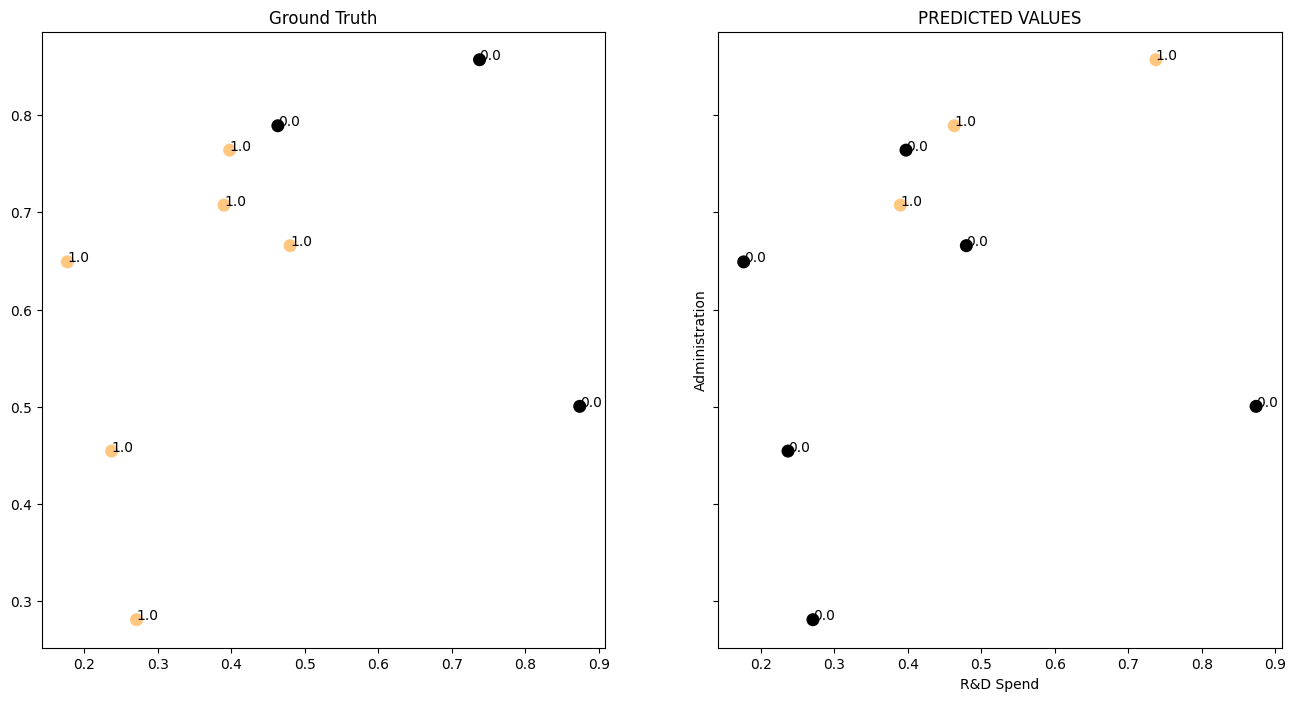

In [107]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True, figsize=(16, 8))

ax1.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='copper', s=70)
ax1.set_title("Ground Truth")
plt.xlabel("R&D Spend")
plt.ylabel("Administration")
plt.title("TRUE VALUES")
for i, txt in enumerate(y_test):
    ax1.annotate(txt, (X_test[:,0][i],X_test[:,1][i]))


# Test set
ax2.scatter(X_test[:,0], X_test[:,1], c=predictions, cmap='copper', s=70)
plt.xlabel("R&D Spend")
plt.ylabel("Administration")
plt.title("PREDICTED VALUES")
for i, txt in enumerate(predictions):
    ax2.annotate(txt, (X_test[:,0][i],X_test[:,1][i]))

plt.show()

***Plot results***

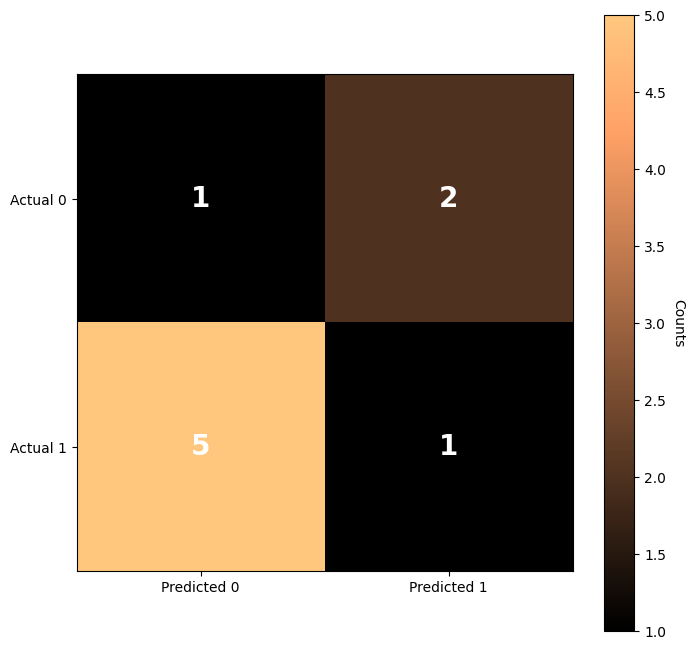

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
cax = ax.imshow(cm, cmap='copper')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=20, weight = 'bold')
cbar = ax.figure.colorbar(cax, ax=ax)
cbar.ax.set_ylabel('Counts', rotation=-90, va="bottom")
plt.show()



In [28]:
target_names = ['California', 'Florida']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

  California       0.17      0.33      0.22         3
     Florida       0.33      0.17      0.22         6

    accuracy                           0.22         9
   macro avg       0.25      0.25      0.22         9
weighted avg       0.28      0.22      0.22         9



***Add regularization***

Implement from scratch the regularized logistic regression model (with all the regularization techniques seen during the course).

In [29]:
import numpy.linalg as LA

def sigmoidM(X, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    y = 1/(1+np.exp(-np.matmul(X,w)))
    return y

def LogisticLoss(X, y, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    points = np.shape(X)[0] # number of rows x

    return -(1/points)*np.sum(y*np.log(sigmoidM(X,w)) + (1-y)*np.log(1-sigmoidM(X,w)))

def OLSGradient(X,y,w, points):
    return (2/points)*(np.transpose(X)@(sigmoidM(X,w)-y))


# RIDGE REGRESSION

In [30]:
def RidgeSquareLoss(X, y, w, lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    w : array of float of dim d
        Weights of the fitted line1995
    lam : float
        Weight of the L2 penalty term
      """
    points = np.shape(X)[0] # number of rows x
    return LogisticLoss(X,y,w) + 1/points*lam*LA.norm(w,2)

def RidgeGradient(w, lam):
    return 2*lam*w

def GDRidge(X, y, iter, gamma, lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    points : int
        Number of points in our dataset
    lam : float
        Weight of the L2 penalty term
    """
    d = np.shape(X)
    L = np.zeros(iter)
    w = np.random.uniform(0, 0.01, d[1])
    W = np.zeros((d[1],iter))
    for i in range(iter):
        W[:,i] = w # Store the current weights in the W array
        w = w - gamma * (OLSGradient(X,y,w,d[0]) + 1/d[0]*RidgeGradient(w, lam))
        # Calculate and store the current loss value with Ridge regularization
        L[i] = RidgeSquareLoss(X,y,w,lam)
    return W, L


In [31]:
iter = 2000
gamma = 0.1
lam = 0.1
w = LR.coef_

wgd_Ridge, Loss_Ridge = GDRidge(X_train, y_train, iter, gamma, lam)
# obtain final coeficients from the last row of the array wdg_Ridge
wpred_Ridge = wgd_Ridge[:,-1]
# oobtain labes
y_pred_Ridge = sigmoidM(X_test, wpred_Ridge)
y_pred_Ridge = np.where(y_pred_Ridge>0.5,1,0)
print('L2 Norm of the Difference Between LR Weigths and LR_Ridge Weights: ',
      LA.norm(w-wpred_Ridge,2))

L2 Norm of the Difference Between LR Weigths and LR_Ridge Weights:  8.156033122511493


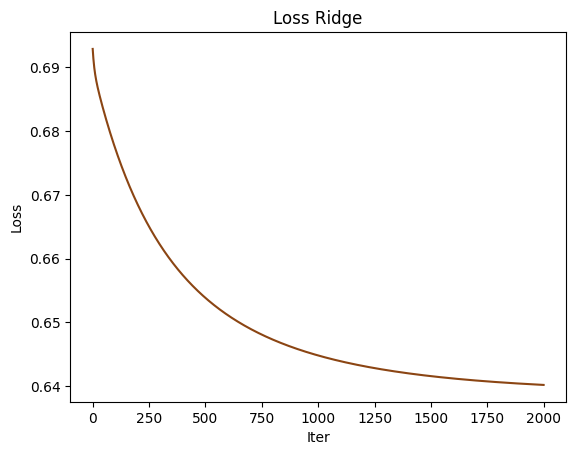

In [85]:
# plot
plt.plot(Loss_Ridge, color = "saddlebrown")
plt.title('Loss Ridge')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

# LASSO REGULARIZATION

In [33]:
def LassoSquareLoss(X, y, w, lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    w : array of float of dim d
        Weights of the fitted line
    lam : float
        Weight of the L1 penalty term
    """
    points = np.shape(X)[0] # number of rows x
    # Loss function
    return LogisticLoss(X,y,w) + 1/points*lam*LA.norm(w,1)

def L1_subgradient(z):
    """
    Compute the subgradient of the absolute value function element-wise.

    Parameters:
    ----------
    z : array-like
        Input array for which the subgradient is calculated.

    Returns:
    ----------
    g : array-like
        Subgradient of the absolute value function applied element-wise to `z`.
    """
    # Create an array g of the same shape as z, initialized with all 1s.
    g = np.ones(z.shape)
    # Check each element of z.
    for i in range(z.shape[0]):
        # If the element is negative, set the corresponding element in g to -1.
        if z[i] < 0.:
            g[i] = -1.0

    # Return the resulting array g, representing the subgradient.
    return g

def LassoGradient(w, lam):
    return lam * L1_subgradient(w)

def GDLasso(X, y, iter, gamma,lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    points : int
        Number of points in our dataset
    d : int
        Dimensionality of each data point in the dataset
    lam : float
        Weight of the L2 penalty term
     Returns:
    ----------
    W : array-like, shape (d, iter)
        Matrix to store weights at each iteration.
    L : array-like, shape (iter,)
        Array to store loss values at each iteration.
    """

    d = np.shape(X)
    L = np.zeros(iter)
    # Initialize weights with random values.
    w = np.random.uniform(0, 0.01, d[1])
    W = np.zeros((d[1],iter))
    # Perform gradient descent iterations.
    for i in range(iter):
        # Store the current weight vector in the W matrix.
        W[:,i] = w
        # Update the weight vector using the gradient of Lasso (L1-regularized) loss.
        w = w - gamma * (OLSGradient(X,y,w,d[0]) + 1/d[0]*LassoGradient(w, lam))
        # Calculate and store the loss value for this iteration.
        L[i] = LassoSquareLoss(X,y,w,lam)
    # Return the matrix of weight vectors and the array of loss values.
    return W, L

In [34]:
iter = 3000
gamma = 0.1
lam = 0.1
w = LR.coef_

wgd_Lasso, Loss_Lasso = GDLasso(X_train, y_train, iter, gamma, lam)
# obtain final coeficients from the last row of array wdg_Ridge
wpred_Lasso= wgd_Lasso[:,-1]
y_pred_Lasso = sigmoidM(X_test, wpred_Lasso)
y_pred_Lasso = np.where(y_pred_Lasso>0.5,1,0)
print('L2 Norm of the Difference Between LR Weigths and LR_Lasso Weights: ',
      LA.norm(w-wpred_Lasso,2))


L2 Norm of the Difference Between LR Weigths and LR_Lasso Weights:  6.183391578932663


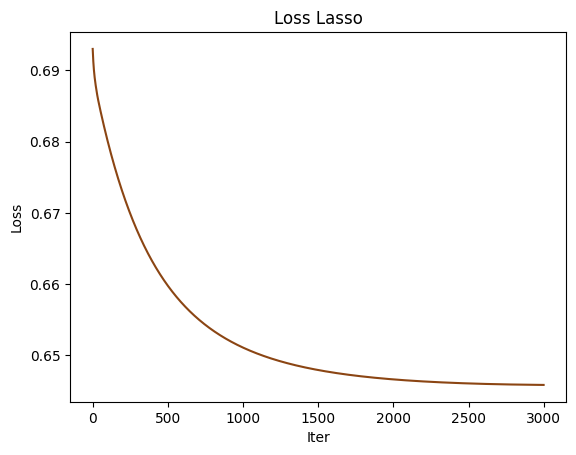

In [84]:
# plot
plt.plot(Loss_Lasso, color = "saddlebrown")
plt.title('Loss Lasso')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()


# ELASTIC NET

In [36]:
def LogisticLoss(X, y, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    n = np.shape(X)[0] # number of rows x
    return -(1/n)*np.sum(y*np.log(sigmoidM(X,w)) + (1-y)*np.log(1-sigmoidM(X,w)))

def OLSGradient(X,y,w, points):
    return (2/points)*(np.transpose(X)@(sigmoidM(X,w)-y))

In [37]:
# Elastic Net Loss Function
def ElasticNetSquareLoss(X, y, w, lr, l, points):
    """
    Calculate the Elastic Net loss for linear regression.

    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset.
    y : array of float of dim n
        Vector containing the ground truth value of each data point.
    w : array of float of dim d
        Weights of the fitted line.
    lr : float
        Convex combination parameter (controls L1 vs. L2 regularization).
    l : float
        Regularization strength parameter.

    Returns
    -------
    loss : float
        Elastic Net loss.
    """
    return LogisticLoss(X, y, w) + 1/points*(lr*l*LA.norm(w, 1) + (1-lr)*l*LA.norm(w, 2))

# Elastic Net Gradient Function
def ElasticNetGradient(X, y, w, lr, l, points):
    """
    Calculate the gradient for Elastic Net regularization.

    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset.
    y : array of float of dim n
        Vector containing the ground truth value of each data point.
    w : array of float of dim d
        Weights of the fitted line.
    lr : float
        Convex combination parameter (controls L1 vs. L2 regularization).
    l : float
        Regularization strength parameter.
    points : int
        Number of data points.

    Returns
    -------
    gradient : array of float of dim d
        Gradient of the Elastic Net regularization term.
    """
    return OLSGradient(X,y,w,points) + l/points*((1-lr)* RidgeGradient(w, l) + lr*LassoGradient(w, l))

# Gradient Descent with Elastic Net Regularization
def GDElasticNet(X, y, lr, l, iter, gamma):
    """
    Perform Gradient Descent with Elastic Net regularization for linear regression.

    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset.
    y : array of float of dim n
        Vector containing the ground truth value of each data point.
    lr : float
        Convex combination parameter (controls L1 vs. L2 regularization).
    l : float
        Regularization strength parameter.
    iter : int
        Number of GD iterations.
    gamma : float
        Learning rate.

    Returns
    -------
    W : array of float of dim d x iter
        Weight vectors at each iteration.
    L : array of float of dim iter
        Loss values at each iteration.
    """
    points = X.shape[0]
    d = X.shape[1]
    W = np.zeros((d, iter))
    L = np.zeros(iter)
    w = np.random.normal(0, 0.1, d)
    for i in range(iter):
        W[:, i] = w
        w = w - gamma * ElasticNetGradient(X, y, w, lr, l, points)
        L[i] = ElasticNetSquareLoss(X, y, w, lr, l, points)
    return W, L


In [38]:
iter = 3000
gamma = 0.1
lam = 0.1
lr = 0.5

wgd_ElasticNet, Loss_ElasticNet = GDElasticNet(X, y, lr, lam, iter, gamma)
wpred_ElasticNet = wgd_ElasticNet[:,-1]
y_pred_ElasticNet = sigmoidM(X_test, wpred_ElasticNet)
y_pred_ElasticNet = np.where(y_pred_ElasticNet>0.5,1,0)
print('L2 norm of the Differenca Between LR Weigths and LR_ElasticNet Weights: ',
      LA.norm(w-wpred_ElasticNet,2))

L2 norm of the Differenca Between LR Weigths and LR_ElasticNet Weights:  9.375516509063212


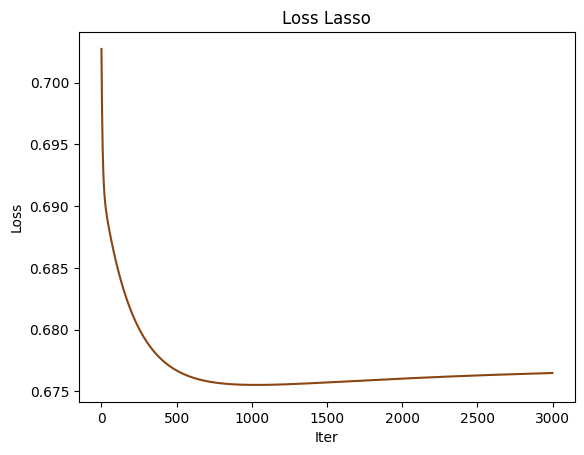

In [83]:
plt.plot(Loss_ElasticNet, color="saddlebrown")
plt.title('Loss Lasso')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

***Model assessment***

Given true and predicted values, compute the most common classification metrics to assess the quality of your predictions.

In [40]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = LR.predict(X_test)

target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.17      0.33      0.22         3
     Florida       0.33      0.17      0.22         6

    accuracy                           0.22         9
   macro avg       0.25      0.25      0.22         9
weighted avg       0.28      0.22      0.22         9



Repeat the previous task for regularized logistic regression and compare the results.

In [41]:
target_names = ['California', 'Florida']
print("Ridge")
print(classification_report(y_test, y_pred_Ridge, target_names=target_names))
print("Lasso")
print(classification_report(y_test, y_pred_Lasso, target_names=target_names))
print("Elastic Net")
print(classification_report(y_test, y_pred_ElasticNet, target_names=target_names))

Ridge
              precision    recall  f1-score   support

  California       0.20      0.33      0.25         3
     Florida       0.50      0.33      0.40         6

    accuracy                           0.33         9
   macro avg       0.35      0.33      0.33         9
weighted avg       0.40      0.33      0.35         9

Lasso
              precision    recall  f1-score   support

  California       0.20      0.33      0.25         3
     Florida       0.50      0.33      0.40         6

    accuracy                           0.33         9
   macro avg       0.35      0.33      0.33         9
weighted avg       0.40      0.33      0.35         9

Elastic Net
              precision    recall  f1-score   support

  California       0.20      0.33      0.25         3
     Florida       0.50      0.33      0.40         6

    accuracy                           0.33         9
   macro avg       0.35      0.33      0.33         9
weighted avg       0.40      0.33      0.35       

***ROC curve***

Implement a function for producing the Receiver Operating Characteristic (ROC) curve.

Given true and predicted values, plot the ROC curve using your implemented function.

<ipython-input-110-7d7b64261ae2>:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'r--', color = 'saddlebrown', lw=2)


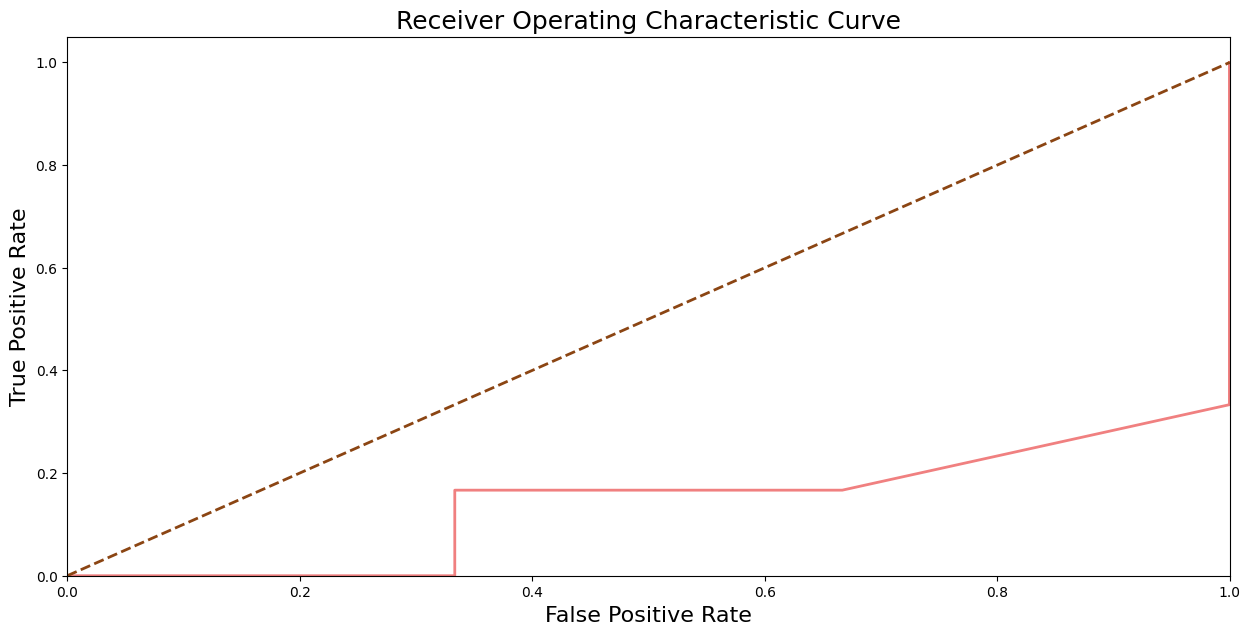

In [110]:
import numpy as np
import matplotlib.pyplot as plt

def find_metrics(y_true, y_pred_prob, threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for true_label, pred_prob in zip(y_true, y_pred_prob):
        predicted_label = 1 if pred_prob >= threshold else 0

        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 0:
                tn += 1
            else:
                fp += 1

    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (tn + fp) if (tn + fp) > 0 else 0

    return [fpr, tpr]

def create_roc(y_true, y_pred_prob, thresholds):
    roc = np.array([])
    for threshold in thresholds:
        fpr, tpr = find_metrics(y_true, y_pred_prob, threshold)
        roc = np.append(roc, [fpr, tpr])

    roc = roc.reshape(-1, 2)
    roc = roc[roc[:,0].argsort()]  # Sort by FPR for correct plotting order
    return roc

# Example usage
thresholds = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
y_pred_prob = LR.predict_proba(X_test)[:, 1]
ROC = create_roc(y_test, y_pred_prob, thresholds)

# Plot ROC Curve
plt.figure(figsize=(15, 7))
plt.plot(ROC[:, 0], ROC[:, 1], color='lightcoral', lw=2)
plt.plot([0, 1], [0, 1], 'r--', color = 'saddlebrown', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.show()


<ipython-input-114-930ab52c57a1>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color='saddlebrown')


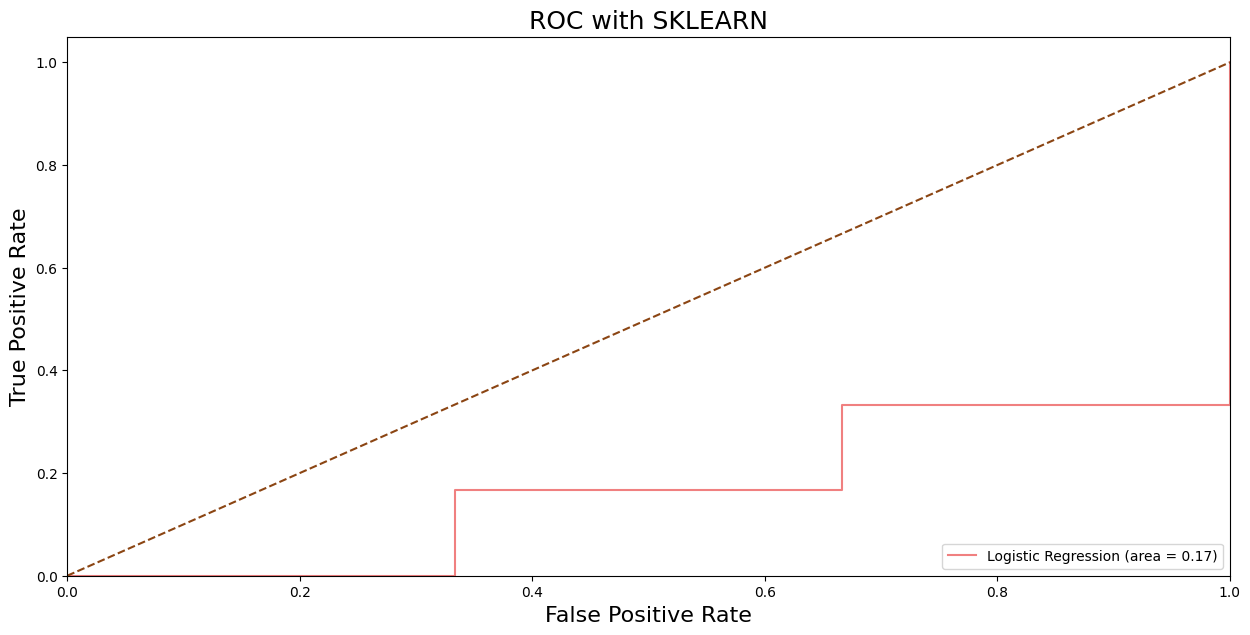

In [114]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr_sklearn, tpr_sklearn, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(15,7))
plt.plot(fpr_sklearn, tpr_sklearn,color='lightcoral', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--', color='saddlebrown')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC with SKLEARN', fontsize=18)
plt.legend(loc="lower right")
plt.show()